In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Sona\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv(r"C:\Users\User\EDA_PROJECT_1\back_0.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\EDA_PROJECT_1\\back_0.csv'

In [3]:
df.head()

,Day,estimated_demand,backorder_demand,Production_Quantity,Quantity_available,Daily_Demand,Demand_with_Backorders,End_Inventory,inventory_Carrying_Cost,Backorders,backorder_Cost,Backordered
0,1,45,0,45,45,37,37,8,40,0,0,0
1,2,45,0,34,42,47,47,0,0,5,50,1
2,3,45,5,44,44,48,53,0,0,9,90,1
3,4,47,9,47,47,45,54,0,0,7,70,1
4,5,46,7,46,46,45,52,0,0,6,60,1


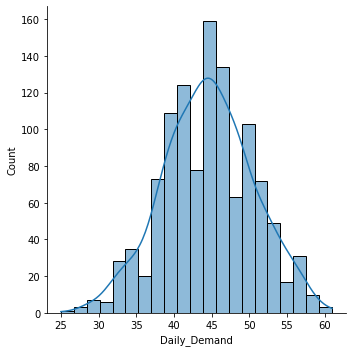

In [4]:
sns.displot(df["Daily_Demand"],kde=True)

<AxesSubplot:>

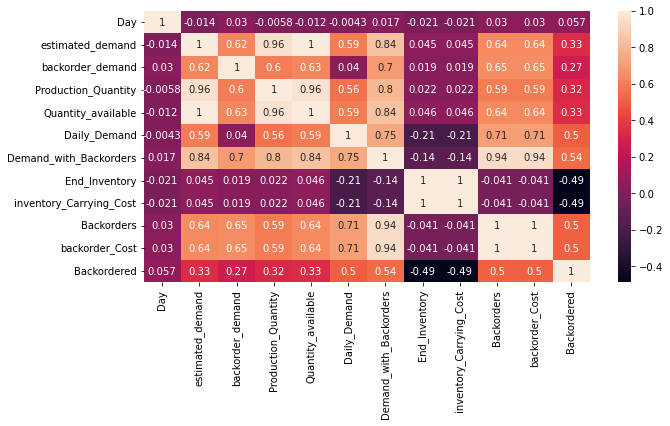

In [5]:
cor=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True)

In [6]:
df.shape

(1125, 12)

In [7]:
ys=df[df["Backordered"]==1].shape[0]
no=df[df["Backordered"]==0].shape[0]
int(ys/no) # 1:7 ratio
print(ys,no)

989 136


In [8]:
a=list(df["Quantity_available"])
b=list(df["Production_Quantity"])
c=list(df["backorder_demand"])
d=list(df["estimated_demand"])
x=pd.DataFrame({"estimated_demand":d,"backorder_demand":c,"Production_Quantity":b,"Quantity_available":a})
y = df['Backordered']

In [9]:
df_2=pd.concat([x,y],ignore_index=False,axis=1)
df_2

,estimated_demand,backorder_demand,Production_Quantity,Quantity_available,Backordered
0,45,0,45,45,0
1,45,0,34,42,1
2,45,5,44,44,1
3,47,9,47,47,1
4,46,7,46,46,1
...,...,...,...,...,...
1120,40,7,40,40,0
1121,40,0,40,40,1
1122,40,5,40,40,1
1123,45,7,45,45,1


In [10]:
# dealing with imbalanced data
from imblearn.over_sampling import SMOTE
u,v=SMOTE().fit_resample(df_2.drop(columns=["Backordered"]),y)

In [11]:
df2=pd.concat([u,v],ignore_index=False,axis=1)
df2.shape

(1978, 5)

<AxesSubplot:>

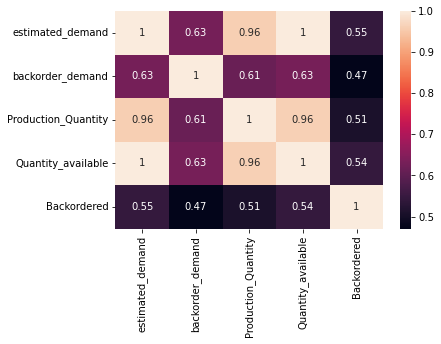

In [12]:
cr_1=df2.corr()
sns.heatmap(cr_1,annot=True)

In [14]:
# droping columns with high vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = df2.columns
vif["VIF Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif

,features,VIF Factor
0,estimated_demand,383976.917990
1,backorder_demand,3.021686
2,Production_Quantity,1629.845608
3,Quantity_available,392812.363383
4,Backordered,2.645557


In [15]:
df_3=df2.drop(columns=["Quantity_available","estimated_demand"])
df_3

,backorder_demand,Production_Quantity,Backordered
0,0,45,0
1,0,34,1
2,5,44,1
3,9,47,1
4,7,46,1
...,...,...,...
1973,4,43,0
1974,8,38,0
1975,6,39,0
1976,0,40,0


In [17]:
# vif reduced
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = df_3.columns
vif["VIF Factor"] = [variance_inflation_factor(df_3.values, i) for i in range(df_3.shape[1])]
vif

,features,VIF Factor
0,backorder_demand,2.983618
1,Production_Quantity,2.889032
2,Backordered,2.637183


In [19]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
u1,u2=df_3.drop(columns=["Backordered"]),df_3.loc[:,["Backordered"]]
u1=scaler.fit_transform(u1)
u2=scaler.fit_transform(u2)

In [20]:
'''
# standardizing dataset without droping features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
v1,v2=df_2.drop(columns=["Backordered"]),df_2.loc[:,["Backordered"]]
v1=scaler.fit_transform(v1)
v2=scaler.fit_transform(v2)
'''

'\n# standardizing dataset without droping features\nfrom sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\nv1,v2=df_2.drop(columns=["Backordered"]),df_2.loc[:,["Backordered"]]\nv1=scaler.fit_transform(v1)\nv2=scaler.fit_transform(v2)\n'

In [22]:
x1,y1=u1,u2

In [24]:
# hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [25]:
# 80% train 20% test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=1)

In [26]:
# stratified (k=5)k fold cross validation
from sklearn.model_selection import cross_val_score
d1={"rf":0,"knn":0,"lr":0,"svc":0,"xgb":0,"bb":0}
d2={"rf":0,"knn":0,"lr":0,"svc":0,"xgb":0,"bb":0}

In [31]:
# triple quote code is for hyperparameter tuning takes more time running code (previous executed results mentioned in comments)
# remove triple quotes to check results

In [32]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion= 'gini',min_samples_leaf= 3,min_samples_split= 4,n_estimators= 25)
rf1=RandomForestClassifier(criterion= 'gini',min_samples_leaf= 3,min_samples_split= 4,n_estimators= 25)
rf.fit(X_train,y_train)
y_rf = rf.predict(X_test)
d1["rf"]=cross_val_score(rf1,x1,y1,scoring="f1", cv = 5).mean()
d2["rf"]=cross_val_score(rf1,x1,y1,scoring="roc_auc", cv = 5).mean()
'''
params_rf={"criterion":["gini","entropy"], "n_estimators":[10, 15, 20, 25, 27, 30], "min_samples_leaf": [1, 2, 3, 4, 5], "min_samples_split": [2, 3, 4, 5, 6, 7]}
hprf = GridSearchCV(rf1,param_grid=params_rf,scoring='roc_auc',cv=5)
hprf.fit(X_train,y_train)
k=hprf.best_params_
'''

C:\Users\User\AppData\Local\Temp/ipykernel_10700/3307707169.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

'\nparams_rf={"criterion":["gini","entropy"], "n_estimators":[10, 15, 20, 25, 27, 30], "min_samples_leaf": [1, 2, 3, 4, 5], "min_samples_split": [2, 3, 4, 5, 6, 7]}\nhprf = GridSearchCV(rf1,param_grid=params_rf,scoring=\'roc_auc\',cv=5)\nhprf.fit(X_train,y_train)\nk=hprf.best_params_\n'

In [33]:
#p1={"rf":k,"knn":0,"lr":0,"svc":0,"xgb":0}
#p1["rf"]=hprf.best_params_

In [35]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm = 'auto',leaf_size= 5,n_neighbors= 14,weights= 'uniform')
knn1=KNeighborsClassifier(algorithm = 'auto',leaf_size= 5,n_neighbors= 14,weights= 'uniform')
knn.fit(X_train,y_train)
y_knn = knn.predict(X_test)
d1["knn"]=cross_val_score(knn1,x1,y1,scoring="f1", cv = 5).mean()
d2["knn"]=cross_val_score(knn1,x1,y1,scoring="roc_auc", cv = 5).mean()
'''
params_knn={"n_neighbors": [3, 4, 5, 7, 9, 12, 14, 15, 16, 17], "leaf_size": [1, 2, 3, 5], "weights":["uniform", "distance"], "algorithm": ["auto", "ball tree", "kd tree", "brute"]}
hpkn = GridSearchCV(knn1,param_grid=params_knn,scoring='roc_auc',cv=5)
hpkn.fit(X_train,y_train)
hpkn.best_params_
p1["knn"]=hpkn.best_params_
'''

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

'\nparams_knn={"n_neighbors": [3, 4, 5, 7, 9, 12, 14, 15, 16, 17], "leaf_size": [1, 2, 3, 5], "weights":["uniform", "distance"], "algorithm": ["auto", "ball tree", "kd tree", "brute"]}\nhpkn = GridSearchCV(knn1,param_grid=params_knn,scoring=\'roc_auc\',cv=5)\nhpkn.fit(X_train,y_train)\nhpkn.best_params_\np1["knn"]=hpkn.best_params_\n'

In [36]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C= 0.1, penalty= 'l2')
lr1=LogisticRegression(C= 0.1, penalty = 'l2')
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
d1["lr"]=cross_val_score(lr1,x1,y1,scoring="f1", cv = 5).mean()
d2["lr"]=cross_val_score(lr1,x1,y1,scoring="roc_auc", cv = 5).mean()
''''
params_lr={"penalty":["l2","none"],"C":[0.001, 0.01, 0.1, 1, 2]}
hplr = GridSearchCV(lr1,param_grid=params_lr,scoring='roc_auc',cv=5,error_score='raise')
hplr.fit(X_train,y_train)
hplr.best_params_
p1["lr"]=hplr.best_params_
'''

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

'\'\nparams_lr={"penalty":["l2","none"],"C":[0.001, 0.01, 0.1, 1, 2]}\nhplr = GridSearchCV(lr1,param_grid=params_lr,scoring=\'roc_auc\',cv=5,error_score=\'raise\')\nhplr.fit(X_train,y_train)\nhplr.best_params_\np1["lr"]=hplr.best_params_\n'

In [37]:
# SVM
from sklearn.svm import SVC
SVM=SVC(C= 15, kernel= 'rbf')
SVM1=SVC(C= 15, kernel= 'rbf')
SVM.fit(X_train,y_train)
y_SVM = SVM.predict(X_test)
d1["svc"]=cross_val_score(SVM1,x1,y1,scoring="f1", cv = 5).mean()
d2["svc"]=cross_val_score(SVM1,x1,y1,scoring="roc_auc", cv = 5).mean()
'''
params_svc={"C": [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], "kernel":["linear","sigmoid","rbf","poly"]}
hpsvc = GridSearchCV(SVM1,param_grid=params_svc,scoring='roc_auc',cv=5,error_score='raise')
hpsvc.fit(X_train,y_train)
hpsvc.best_params_
p1["svc"]=hpsvc.best_params_
'''

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

'\nparams_svc={"C": [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], "kernel":["linear","sigmoid","rbf","poly"]}\nhpsvc = GridSearchCV(SVM1,param_grid=params_svc,scoring=\'roc_auc\',cv=5,error_score=\'raise\')\nhpsvc.fit(X_train,y_train)\nhpsvc.best_params_\np1["svc"]=hpsvc.best_params_\n'

In [38]:
# ensemble models-bagging(BB),boosting(xgb,lgbm),stack blending(stack ensemble model)

In [39]:
# XGBClassifier
from xgboost import XGBClassifier
xgb=XGBClassifier(gamma= 0, max_depth= 10, min_child_weight= 5)
xgb1=XGBClassifier(gamma= 0, max_depth= 10, min_child_weight= 5)
xgb.fit(X_train,y_train)
y_xgb = xgb.predict(X_test)
d1["xgb"]=cross_val_score(xgb1,x1,y1,scoring="f1", cv = 5).mean()
d2["xgb"]=cross_val_score(xgb1,x1,y1,scoring="roc_auc", cv = 5).mean()
'''
params_xgb={"max_depth": [1,5,10], "min_child_weight": [1,5,10], "gamma": [0, 0.5,1]}
hpxgb = GridSearchCV(xgb1,param_grid=params_xgb,scoring='roc_auc',cv=5,error_score='raise')
hpxgb.fit(X_train,y_train)
hpxgb.best_params_
p1["xgb"]=hpxgb.best_params_
'''

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dty

[21:30:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dty

[21:30:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dty

[21:30:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dty

[21:30:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dty

[21:30:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dty

'\nparams_xgb={"max_depth": [1,5,10], "min_child_weight": [1,5,10], "gamma": [0, 0.5,1]}\nhpxgb = GridSearchCV(xgb1,param_grid=params_xgb,scoring=\'roc_auc\',cv=5,error_score=\'raise\')\nhpxgb.fit(X_train,y_train)\nhpxgb.best_params_\np1["xgb"]=hpxgb.best_params_\n'

In [40]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
bb = BaggingClassifier(n_estimators= 500)
bb1=BaggingClassifier(n_estimators= 500)
bb.fit(X_train,y_train)
y_bb = bb.predict(X_test)
d1["bb"]=cross_val_score(bb1,x1,y1,scoring="f1", cv = 5).mean()
d2["bb"]=cross_val_score(bb1,x1,y1,scoring="roc_auc", cv = 5).mean()
'''
params_bb={"n_estimators": [10, 50, 100, 500, 1000,1500]}
hpbb = GridSearchCV(bb1,param_grid=params_bb,scoring='roc_auc',cv=5,error_score='raise')
hpbb.fit(X_train,y_train)
hpbb.best_params_
p1["bb"]=hpbb.best_params_
'''

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

'\nparams_bb={"n_estimators": [10, 50, 100, 500, 1000,1500]}\nhpbb = GridSearchCV(bb1,param_grid=params_bb,scoring=\'roc_auc\',cv=5,error_score=\'raise\')\nhpbb.fit(X_train,y_train)\nhpbb.best_params_\np1["bb"]=hpbb.best_params_\n'

In [41]:
#!pip3 install lightgbm
import lightgbm
from lightgbm import LGBMClassifier

In [42]:
# LGBMClassifier
lgbm = LGBMClassifier(n_estimators= 440, num_leaves= 20)
lgbm1=LGBMClassifier(n_estimators= 440, num_leaves= 20)
lgbm.fit(X_train,y_train)
y_lgbm = lgbm.predict(X_test)
d1["lgbm"]=cross_val_score(lgbm1,x1,y1,scoring="f1", cv = 5).mean()
d2["lgbm"]=cross_val_score(lgbm1,x1,y1,scoring="roc_auc", cv = 5).mean()
'''
params_lgbm={"n_estimators":list(range (200, 600, 80)), "num_leaves":list(range (20, 60, 10))}
hplgbm = GridSearchCV(lgbm1,param_grid=params_lgbm,scoring='roc_auc',cv=5,error_score='raise')
hplgbm.fit(X_train,y_train)
hplgbm.best_params_
p1["lgbm"]=hplgbm.best_params_
'''

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

'\nparams_lgbm={"n_estimators":list(range (200, 600, 80)), "num_leaves":list(range (20, 60, 10))}\nhplgbm = GridSearchCV(lgbm1,param_grid=params_lgbm,scoring=\'roc_auc\',cv=5,error_score=\'raise\')\nhplgbm.fit(X_train,y_train)\nhplgbm.best_params_\np1["lgbm"]=hplgbm.best_params_\n'

In [43]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion= 'gini', max_depth= 10)
dt1= DecisionTreeClassifier(criterion= 'gini', max_depth= 10)
dt.fit(X_train,y_train)
y_dt = dt.predict(X_test)
d1["dt"]=cross_val_score(dt1,x1,y1,scoring="f1", cv = 5).mean()
d2["dt"]=cross_val_score(dt1,x1,y1,scoring="roc_auc", cv = 5).mean()
'''
params_dt={"criterion" : ['gini', 'entropy'],"max_depth" : [2,4,6,8,10,12]}
hpdt = GridSearchCV(dt1,param_grid=params_dt,scoring='roc_auc',cv=5,error_score='raise')
hpdt.fit(X_train,y_train)
hpdt.best_params_
p1["dt"]=hpdt.best_params_
'''

'\nparams_dt={"criterion" : [\'gini\', \'entropy\'],"max_depth" : [2,4,6,8,10,12]}\nhpdt = GridSearchCV(dt1,param_grid=params_dt,scoring=\'roc_auc\',cv=5,error_score=\'raise\')\nhpdt.fit(X_train,y_train)\nhpdt.best_params_\np1["dt"]=hpdt.best_params_\n'

In [44]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing= 1.0)
gnb1 = GaussianNB(var_smoothing= 1.0)
gnb.fit(X_train,y_train)
y_gnb = gnb.predict(X_test)
d1["gnb"]=cross_val_score(gnb1,x1,y1,scoring="f1", cv = 5).mean()
d2["gnb"]=cross_val_score(gnb1,x1,y1,scoring="roc_auc", cv = 5).mean()
'''
params_gnb={'var_smoothing': [0.01, 0.1, 0.5, 1.0, 10.0]}
hpgnb = GridSearchCV(gnb1,param_grid=params_gnb,scoring='roc_auc',cv=5,error_score='raise')
hpgnb.fit(X_train,y_train)
hpgnb.best_params_
p1["gnb"]=hpgnb.best_params_
'''

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

'\nparams_gnb={\'var_smoothing\': [0.01, 0.1, 0.5, 1.0, 10.0]}\nhpgnb = GridSearchCV(gnb1,param_grid=params_gnb,scoring=\'roc_auc\',cv=5,error_score=\'raise\')\nhpgnb.fit(X_train,y_train)\nhpgnb.best_params_\np1["gnb"]=hpgnb.best_params_\n'

In [45]:
# stack ensemble model
from sklearn.ensemble import StackingClassifier
b1=LGBMClassifier(n_estimators= 440, num_leaves= 20)
b2=XGBClassifier(gamma= 0, max_depth= 10, min_child_weight= 5)
b3=BaggingClassifier(n_estimators= 500)
b=[("b1",b1),("b2",b2),("b3",b3)]
#m1=RandomForestClassifier()

In [46]:
rf2 = RandomForestClassifier()
knn2=KNeighborsClassifier()
lr2=LogisticRegression()
SVM2=SVC()
xgb2=XGBClassifier()
bb2 = BaggingClassifier()
lgbm2 = LGBMClassifier()
dt2= DecisionTreeClassifier()
gnb2 = GaussianNB()
lst=[rf2,knn2,lr2,SVM2,xgb2,bb2,lgbm2,dt2,gnb2]
lst1=["rf","knn","lr","SVM","xgb","bb","lgbm","dt","gnb"]
dst={}

In [48]:
'''
# checking for best meta model
# best base models are xgb,bb,lgbm
for i in range(len(lst)):
    clf_stack2 = StackingClassifier(estimators =b, final_estimator= lst[i])
    dst[lst1[i]]=cross_val_score(clf_stack2,x1,y1,scoring="roc_auc", cv = 5).mean()
dst
'''

'\n# checking for best meta model\n# best base models are xgb,bb,lgbm\nfor i in range(len(lst)):\n    clf_stack2 = StackingClassifier(estimators =b, final_estimator= lst[i])\n    dst[lst1[i]]=cross_val_score(clf_stack2,x1,y1,scoring="roc_auc", cv = 5).mean()\ndst\n'

In [49]:
'''
# lr gives bes roc_auc score as meta model
{'rf': 0.8366229593271587,
 'knn': 0.8267690492578972,
 'lr': 0.8661507139279792,
 'SVM': 0.8229950119044105,
 'xgb': 0.8464250384685702,
 'bb': 0.8326265915059945,
 'lgbm': 0.8345278012136955,
 'dt': 0.7816259296031639,
 'gnb': 0.8661354611593037}
 '''

"\n# lr gives bes roc_auc score as meta model\n{'rf': 0.8366229593271587,\n 'knn': 0.8267690492578972,\n 'lr': 0.8661507139279792,\n 'SVM': 0.8229950119044105,\n 'xgb': 0.8464250384685702,\n 'bb': 0.8326265915059945,\n 'lgbm': 0.8345278012136955,\n 'dt': 0.7816259296031639,\n 'gnb': 0.8661354611593037}\n "

In [50]:
m1=LogisticRegression() # gave best values as meta model

In [51]:
clf_stack = StackingClassifier(estimators =b, final_estimator= m1)
clf_stack.fit(X_train,y_train)
clf_stack1=StackingClassifier(estimators =b, final_estimator= m1)
y_stack =clf_stack.predict(X_test)
d1["st_en"]=cross_val_score(clf_stack1,x1,y1,scoring="f1", cv = 5).mean()
d2["st_en"]=cross_val_score(clf_stack1,x1,y1,scoring="roc_auc", cv = 5).mean()

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg

[21:41:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:41:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg

[21:41:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:41:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg

[21:41:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:41:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg

[21:41:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:41:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg

[21:41:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:41:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg

[21:41:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:41:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg

[21:42:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:42:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg

[21:42:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:42:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg

[21:42:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:42:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg

[21:42:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:42:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg

[21:42:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:42:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [52]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_rf)
precision = metrics.precision_score(y_test,y_rf)
recall = metrics.recall_score(y_test,y_rf)
f1 = metrics.f1_score(y_test,y_rf)
f1

0.7875354107648727

In [53]:
from sklearn.metrics import roc_curve,roc_auc_score
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

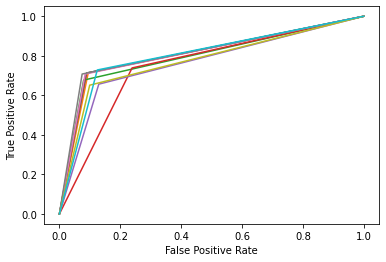

In [54]:
plot_roc_curve(y_test,y_xgb)
plot_roc_curve(y_test,y_rf)
plot_roc_curve(y_test,y_knn)
plot_roc_curve(y_test,y_lr)
plot_roc_curve(y_test,y_SVM)
plot_roc_curve(y_test,y_bb)
plot_roc_curve(y_test,y_lgbm)
plot_roc_curve(y_test,y_dt)
plot_roc_curve(y_test,y_gnb)
plot_roc_curve(y_test,y_stack)

In [56]:
# AUC for 80:20 train test
d_roc={}
d_roc["xgb"]=roc_auc_score(y_test,y_xgb)
d_roc["rf"]=roc_auc_score(y_test,y_rf)
d_roc["knn"]=roc_auc_score(y_test,y_knn)
d_roc["lr"]=roc_auc_score(y_test,y_lr)
d_roc["svm"]=roc_auc_score(y_test,y_SVM)
d_roc["bb"]=roc_auc_score(y_test,y_bb)
d_roc["lgbm"]=roc_auc_score(y_test,y_lgbm)
d_roc["dt"]=roc_auc_score(y_test,y_dt)
d_roc["gnb"]=roc_auc_score(y_test,y_gnb)
d_roc["stack"]=roc_auc_score(y_test,y_stack)
d_roc

{'xgb': 0.8116341370072714,
 'rf': 0.8091465748182166,
 'knn': 0.7986605434366629,
 'lr': 0.7498277841561424,
 'svm': 0.7635285112897053,
 'bb': 0.8116341370072714,
 'lgbm': 0.8115575966322236,
 'dt': 0.816532721010333,
 'gnb': 0.7758897818599312,
 'stack': 0.801913509376196}

In [57]:
from sklearn.metrics import confusion_matrix
def get_f(y1,y2):
    conf = confusion_matrix(y1,y2)
    TP = conf[0,0]
    FP = conf[0,1]
    FN = conf[1,0]
    TN = conf[1,1]
    return FP/(FP+TN)

In [58]:
fpr_XGB=get_f(y_test,y_xgb)
fpr_knn=get_f(y_test,y_knn)
fpr_LR=get_f(y_test,y_lr)
fpr_rf=get_f(y_test,y_rf)
fpr_SVM=get_f(y_test,y_SVM)
fpr_bb=get_f(y_test,y_bb)
fpr_lgbm=get_f(y_test,y_lgbm)
fpr_dt=get_f(y_test,y_dt)
fpr_gnb=get_f(y_test,y_gnb)
fpr_stack=get_f(y_test,y_stack)
fpr_arr=[fpr_XGB,fpr_rf,fpr_knn,fpr_LR,fpr_SVM,fpr_bb,fpr_lgbm,fpr_dt,fpr_gnb,fpr_stack]
fpr_arr

[0.11464968152866242,
 0.12025316455696203,
 0.10810810810810811,
 0.25,
 0.16883116883116883,
 0.11464968152866242,
 0.10967741935483871,
 0.09803921568627451,
 0.1360544217687075,
 0.1497005988023952]

In [59]:
rr_XGB=metrics.recall_score(y_test,y_xgb)
rr_rf=metrics.recall_score(y_test,y_rf)
rr_knn=metrics.recall_score(y_test,y_knn)
rr_LR=metrics.recall_score(y_test,y_lr)
rr_SVM=metrics.recall_score(y_test,y_SVM)
rr_bb=metrics.recall_score(y_test,y_bb)
rr_lgbm=metrics.recall_score(y_test,y_lgbm)
rr_dt=metrics.recall_score(y_test,y_dt)
rr_gnb=metrics.recall_score(y_test,y_gnb)
rr_stack=metrics.recall_score(y_test,y_stack)
rr_arr=[rr_XGB,rr_rf,rr_knn,rr_LR,rr_SVM,rr_bb,rr_lgbm,rr_dt,rr_gnb,rr_stack]
rr_arr

[0.7128205128205128,
 0.7128205128205128,
 0.676923076923077,
 0.7384615384615385,
 0.6564102564102564,
 0.7128205128205128,
 0.7076923076923077,
 0.7076923076923077,
 0.6512820512820513,
 0.7282051282051282]

In [61]:
profit_arr=((np.array([5]*10)*rr_arr)-(np.array([2.5]*10)*fpr_arr))
profit_arr

array([3.27747836, 3.26346965, 3.11434511, 3.06730769, 2.85997336,
       3.27747836, 3.26426799, 3.2933635 , 2.9162742 , 3.26677414])

In [62]:
alg_arr=np.array(["XGB","RF","KNN","LR","SVM","BB","LGBM","DT","GNB","Stack"])

<AxesSubplot:xlabel='ML Algorithms', ylabel='Expectrd Profit(%)'>

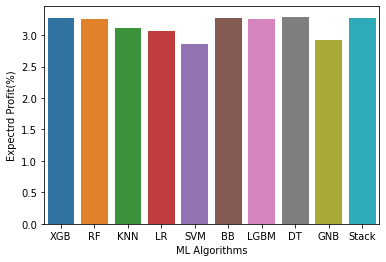

In [63]:
plt.xlabel("ML Algorithms")
plt.ylabel("Expectrd Profit(%)")
sns.barplot(x=alg_arr,y=profit_arr)

In [66]:
d1 # F1 score

{'rf': 0.7805826563716823,
 'knn': 0.708333588886938,
 'lr': 0.7480466192830955,
 'svc': 0.7133056888355529,
 'xgb': 0.7789704780782225,
 'bb': 0.781360565741909,
 'lgbm': 0.7861068619145966,
 'dt': 0.7719851029969979,
 'gnb': 0.707396764269026,
 'st_en': 0.7868456360761313}

In [67]:
d2  #best:3{lgbm,xgb,rf} in terms of AUC score

{'rf': 0.8557857066278848,
 'knn': 0.8156327671940653,
 'lr': 0.823438766478299,
 'svc': 0.8170647924147385,
 'xgb': 0.8583485731539877,
 'bb': 0.8567671795636723,
 'lgbm': 0.8600014009758665,
 'dt': 0.8510910908811231,
 'gnb': 0.8240300508028551,
 'st_en': 0.8593961586847296}

In [68]:
#p1 # hyperparameter dictionary

In [69]:
# hyper parameter tuning values we got
'''
{'rf': {'criterion': 'gini',
  'min_samples_leaf': 3,
  'min_samples_split': 4,
  'n_estimators': 25},
 'knn': {'algorithm': 'auto',
  'leaf_size': 5,
  'n_neighbors': 14,
  'weights': 'uniform'},
 'lr': {'C': 0.1, 'penalty': 'l2'},
 'svc': {'C': 15, 'kernel': 'rbf'},
 'xgb': {'gamma': 0, 'max_depth': 10, 'min_child_weight': 5},
 'bb': {'n_estimators': 500},
 'lgbm': {'n_estimators': 440, 'num_leaves': 20},
 'dt': {'criterion': 'gini', 'max_depth': 10},
 'gnb': {'var_smoothing': 1.0}}
'''

"\n{'rf': {'criterion': 'gini',\n  'min_samples_leaf': 3,\n  'min_samples_split': 4,\n  'n_estimators': 25},\n 'knn': {'algorithm': 'auto',\n  'leaf_size': 5,\n  'n_neighbors': 14,\n  'weights': 'uniform'},\n 'lr': {'C': 0.1, 'penalty': 'l2'},\n 'svc': {'C': 15, 'kernel': 'rbf'},\n 'xgb': {'gamma': 0, 'max_depth': 10, 'min_child_weight': 5},\n 'bb': {'n_estimators': 500},\n 'lgbm': {'n_estimators': 440, 'num_leaves': 20},\n 'dt': {'criterion': 'gini', 'max_depth': 10},\n 'gnb': {'var_smoothing': 1.0}}\n"